# Import Modules

In [1]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn import svm

# Store Model Information

In [2]:
model_cols = ['ModelName','Accuracy','Precision','Recall','Mean Squared Error']
model_info = pd.DataFrame(columns=model_cols)

# Load Cleaned Data

In [3]:
filePath = os.path.join('../','../','../','Data','Stage','NoShowAppointments_cleaned.csv')
df = pd.read_csv(filePath,low_memory=False)

# Build data to model

In [4]:
X = df.drop(['NoShow','AppointmentID','PatientId'], axis=1)
y = df['NoShow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# TensorFlow

In [5]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
X = df.drop(['NoShow','AppointmentID','PatientId'],axis=1).values
y = df['NoShow'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [7]:
scaler = MinMaxScaler()

In [8]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=110,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [12]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 82894 samples, validate on 27632 samples
Epoch 1/600
82894/82894 [==============================] - 6s 72us/sample - loss: 0.4172 - val_loss: 0.2646
Epoch 2/600
82894/82894 [==============================] - 5s 61us/sample - loss: 0.2646 - val_loss: 0.2355
Epoch 3/600
82894/82894 [==============================] - 6s 71us/sample - loss: 0.2466 - val_loss: 0.2370
Epoch 4/600
82894/82894 [==============================] - 6s 71us/sample - loss: 0.2436 - val_loss: 0.2356
Epoch 5/600
82894/82894 [==============================] - 6s 67us/sample - loss: 0.2420 - val_loss: 0.2325
Epoch 6/600
82894/82894 [==============================] - 5s 66us/sample - loss: 0.2401 - val_loss: 0.2324
Epoch 7/600
82894/82894 [==============================] - 5s 65us/sample - loss: 0.2393 - val_loss: 0.2327
Epoch 8/600
82894/82894 [==============================] - 6s 67us/sample - loss: 0.2389 - val_loss: 0.2336
Epoch 9/600
82894/82894 [==============================] - 6s 67us/sample - loss: 0.23

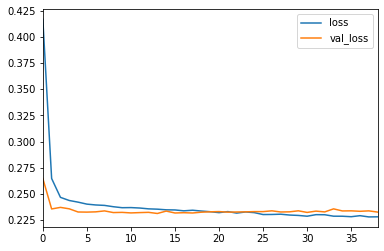

In [13]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [14]:
predictions = model.predict_classes(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,predictions))

[[19228  2943]
 [  513  4948]]


In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.87492762015055
Precision: 0.6270434672411608
Recall: 0.9060611609595313


In [18]:
name = 'Artificial Neural Network (ANN)'
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
msqe = metrics.mean_squared_error(y_test, predictions)
model_info = model_info.append(
    {
        'ModelName': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Mean Squared Error': msqe        
    },
    ignore_index=True)

In [19]:
#save model to current directory
model.save('final_apptnoshow_model.h5') 

#save model to api testing directory
model.save(os.path.join('../','APITesting','final_apptnoshow_model.h5'))

#save model to api directory 
model.save(os.path.join('../','ModelAPI','final_apptnoshow_model.h5'))


# Show Table Metrics

In [20]:
model_info

,ModelName,Accuracy,Precision,Recall,Mean Squared Error
0,Artificial Neural Network (ANN),0.874928,0.627043,0.906061,0.125072


# Save Scaler

In [21]:
import joblib

In [22]:
#save scaler to current directory
joblib.dump(scaler,'apptnoshow_scaler.pkl')

#save scaler to api testing directory
joblib.dump(scaler,os.path.join('../','APITesting','apptnoshow_scaler.pkl'))

#save scaler to api directory 
joblib.dump(scaler,os.path.join('../','ModelAPI','apptnoshow_scaler.pkl'))


['../ModelAPI/apptnoshow_scaler.pkl']